<h1 align=center> ML And Data Science Project Lifecycle And Steps In Depth </h1>

Learn about all the stages involved in executing a machine learning and data science project.

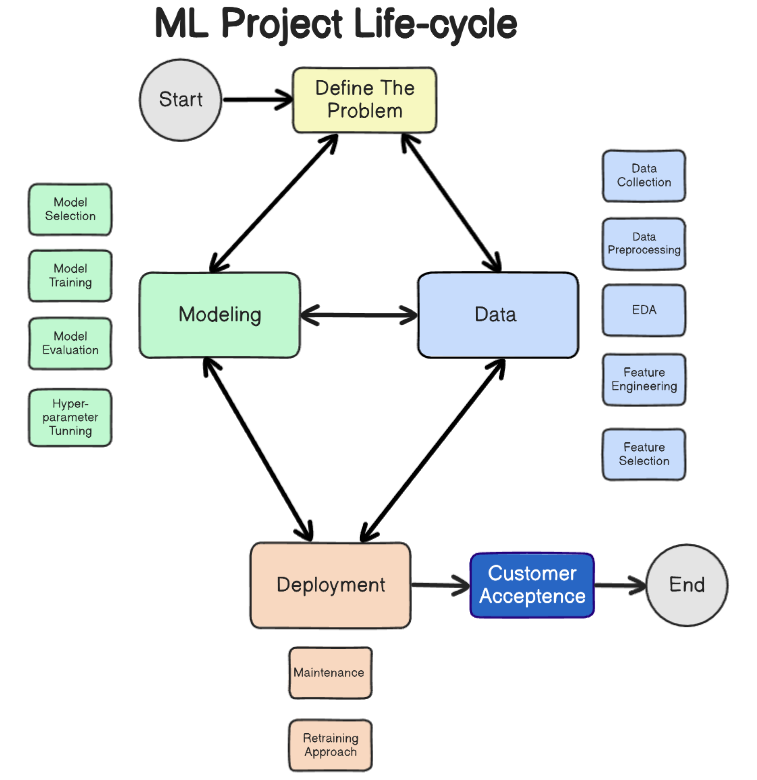

### Contents:

### **1. Problem Definition**

### **2. Requirement Gathering And EDA**

- Get the dataset
- Display the data
- Check the data type, info, shape
- Check for null values
- Check for duplicates
- Check for an imbalanced dataset
- Check for relationships between features
- Check for outliers
- Data Visualization

### **3. Feature Engineering**

- Handling missing values
- Feature Encoding
- Handling imbalanced dataset
- Handling outliers
- Scaling the dataset
- Split the dataset

### **4. Feature Selection**

### **5. Model Creation**

### **6. Model Evaluation and hyper-parameter tuning**

### **7. Model Deployment**

### **8. Maintenance And Retraining Approach**

---

### 1. Problem Definition

- A clear statement describing the initial state of a problem that is to be solved.
- What you want to achieve with ML.
- Why it matters.
- How you will measure success.

---

### 2. Requirement Gathering And EDA

- **Data collection** revolves around gathering raw data from various sources, with the objective of using it for analysis and decision-making. It includes manual data entries, online surveys, extracting information from documents and databases, capturing signals from sensors, and more.
- Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.
- EDA is an important first step in any data analysis.

### Steps:

- Display data (First Look)

```
df.head()
df.tail()
df.sample()
```

- Looking for Statistical description of dataset

```
df.describe()
```

- Checking the dimensions of data

```
df.shape
```

- Getting each attributes data type and structure

```
df.info()
df.dtype()
```

- Checking for Missing Value

```
df.isnull().sum()
```

- Check the duplicates

```
df.duplicated()
df.drop_duplicates() # remove duplicates
```

- Checking the balance of target feature

```
df.target_column_name.value_counts()
```

- Checking for numerical features
- Checking for distribution of numerical variables (Histogram)
- Checking categorical features
- Checking for outliers (Box plot)
- Check the relationship between features

```
df.corr()
```

- **Data Visualization:** Use visual tools to understand the distribution and relationships within the data.
- **Univariate Analysis**: Visualize single variables using histograms, box plots, or bar charts.
- **Bivariate Analysis**: Explore relationships between two variables using scatter plots, correlation matrices, or line plots.
- **Multivariate Analysis**: Use pair plots, heatmaps, and other multi-dimensional visualizations to explore relationships between multiple variables.

---

### 3. Feature Engineering

- Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models.
- It is a critical step in the data preprocessing pipeline that can significantly influence the results of your models.
- Feature engineering is converting raw data to useful data.

### 1- Handling Missing Values

**Types Of Missing Values:**

1. **MCAR (Missing Completely at Random)**: No pattern in missing data.
2. **MAR (Missing at Random)**: Missing values are related to other observed data.
3. **MNAR (Missing Not at Random)**: Missing values have a pattern and depend on unobserved data.
- Remove missing values

```
df.dropna()
```

- Filling the null values

```
## Hanlding miss values using sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X)
```

```
## Mean/Median/Mode imputation: (MCAR)
df.variable.fillna(df.variable.median) # fill the null values with median value
df.variable.fillna(df.variable.mean) # fill the null values with mean value
df.variable.fillna(df.variable.mode()[0]) # fill the null values most frequent value
```

```
## Arbitrary value imputation: replacing nan by an arbitrary value
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
```

```
## Random sample imputation:taking random observation from the dataset
  # and replacing null values. (MCAR)
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
```

```
## Capturing nan values with new features: works if data are not missing at random
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df['Age'].fillna(df.Age.median(),inplace=True)
```

### 1.1. Best Practices

- **Exploratory Data Analysis (EDA)**: Perform thorough EDA to understand the data and the pattern of missing values.
- **Domain Knowledge**: Leverage domain knowledge to choose the most appropriate imputation method.
- **Iterative Process**: Iteratively test and refine imputation methods to ensure they do not introduce bias or errors.
- **Documentation**: Document the process of handling missing values, including the rationale for chosen methods.

### 2- Feature Encoding

- Converting categorical features into numerical features.

**Categorical Data Types:**

- **Nominal**: Categories with no intrinsic ordering (e.g., color, gender).
- **Ordinal**: Categories with an intrinsic order (e.g., rating scales, education level).

### 2.1. One Hot Encoding

- Creates binary columns for each category.
- Suitable for nominal data.

```
from sklearn.preprocessing import OneHotEncoder
# Create the encoder
encoder = OneHotEncoder(handle_unknown="ignore")

## Or
pd.get_dummies(df, columns=['categorical_column'])
```

- **Pros**: Does not assume any ordinal relationship.
- **Cons**: Increases dimensionality, which can be problematic for datasets with many categories.

### 2.2. Mapping

```
gender_mapping = {'M': 0,
                'F': 1}
df['gender'] = df['gender'].map(gender_mapping)
```

### 2.3. Ordinary Encoding

- Explicitly assigns an ordinal relationship by mapping categories to integers.
- Suitable for ordinal data.

```
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df['encoded_column'] = oe.fit_transform(df[['categorical_column']])
```

- **Pros**: Maintains the order of categories.
- **Cons**: Assumes the order is meaningful and evenly spaced.

### 2.4. Label Encoding

- Assigns a unique integer to each category.
- Suitable for ordinal data.

```
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_column'] = le.fit_transform(df['categorical_column'])
```

- **Pros**: Simple and quick.
- **Cons**: Implicitly assumes an ordinal relationship, which might not exist for nominal data.

### 2.5. Binary Encoding

- Converts categories to binary numbers and splits the digits into separate columns.
- Useful for high cardinality data.

```
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['categorical_column'])
df = encoder.fit_transform(df)
```

- **Pros**: Reduces dimensionality compared to one-hot encoding.
- **Cons**: More complex and can still lead to many columns for very high cardinality.

### 2.6. Target Encoding (Mean Encoding)

- Replaces categories with the mean of the target variable for each category.
- Suitable for high cardinality data in regression problems.

```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['categorical_column'])
df['encoded_column'] = encoder.fit_transform(df['categorical_column'], df['target'])
```

- **Pros**: Can capture the relationship between the category and the target variable.
- **Cons**: Can lead to overfitting, especially with small datasets.

### 2.7. Frequency Encoding

- Replaces categories with their frequency of occurrence.
- Suitable for high cardinality data.

```
freq_encoding = df['categorical_column'].value_counts().to_dict()
df['encoded_column'] = df['categorical_column'].map(freq_encoding)
```

- **Pros**: Simple and captures category importance.
- **Cons**: Assumes frequency is related to the target, which might not always be true.

### Choosing the Right Encoding Method

**Nominal Data**:

- Small cardinality: One-Hot Encoding.
- High cardinality: Target Encoding, Frequency Encoding, or Binary Encoding.

**Ordinal Data**:

- Label Encoding or Ordinal Encoding.

### 3- Handling imbalanced dataset

- Handling imbalanced datasets is crucial in machine learning, especially for classification problems where the number of instances in different classes varies significantly.
- An imbalanced dataset can lead to biased models that perform poorly on the minority class.

### 3.1. Resampling Techniques

**Oversampling**: Increase the number of instances in the minority class.

- **Random Oversampling**: Duplicate random instances of the minority class.

```
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
```

- **SMOTE (Synthetic Minority Over-sampling Technique)**: Generate synthetic instances of the minority class

```
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
```

**Under Sampling**: Reduce the number of instances in the majority class.

- **Random Under sampling**: Remove random instances from the majority class.

```
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
```

- **NearMiss**: Keep instances of the majority class that are close to minority class instances.

```
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss()
X_resampled, y_resampled = nearmiss.fit_resample(X, y)
```

### 3.2. Ensemble Techniques

- **Balanced Random Forest**: Modify the random forest algorithm to balance classes.

```
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
```

- **Easy Ensemble**: Create multiple balanced subsets of the majority class and combine them.

```
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier()
eec.fit(X_train, y_train)
```

### 3.3. Algorithmic Approaches

**Class Weights**: Assign higher weights to the minority class during model training.

- **Scikit-learn**: Many classifiers (e.g., `LogisticRegression`, `RandomForestClassifier`) have a `class_weight` parameter.

```
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
```

- **XGBoost/LightGBM**: Use the `scale_pos_weight` parameter.

```
import xgboost as xgb

model = xgb.XGBClassifier(scale_pos_weight=ratio)
model.fit(X_train, y_train)
```

### Best Practices

- **Cross-Validation**: Use stratified cross-validation to ensure that each fold has a similar class distribution.
- **Data Augmentation**: For image or text data, use augmentation techniques to generate more samples of the minority class.
- **Monitoring Performance**: Continuously monitor precision, recall, F1-score, and AUC-ROC during model evaluation to ensure the model is not biased towards the majority class.
- **Avoiding Data Leakage**: Ensure that oversampling or under sampling is only applied to the training set and not the test set to prevent data leakage.

### 4- Handling outliers

- Outliers are data points that significantly differ from the majority of the data.
- Handling outliers is an important step in data preprocessing, as outliers can significantly affect the performance of machine learning models.

### 4.1. If data normally distributed:

```
upper_bound = df['age'].mean() + 3 * df.age.std()
lower_bound = df['age'].mean() - 3 * df.age.std()

df.loc[df['age']>=73, 'age'] = 73
```

### 4.2. If features are skewed we use the below techniques:

```
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)
lower_bridge = df['fare'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['fare'].quantile(0.75) + (IQR * 1.5)

df.loc[df['fare']>=100, 'age'] = 100
```

`Note:` Apply log transformation can be used to reduce the impact of outliers.

### Best Practices

- **Domain Knowledge**: Use domain knowledge to determine if an outlier is truly an anomaly or a valid data point.
- **Consistency**: Apply consistent methods across similar features to handle outliers.
- **Documentation**: Document the method used to handle outliers and the rationale behind it.
- **Iterative Process**: Handling outliers is often an iterative process, requiring several passes and evaluations.

### 5- Scaling the data

- scaling is transforming numerical features into a small range of values. It ensures that features have similar scales and it helps the model to converge faster.
- Features with different scales can bias the model.
- Algorithms like KNN, SVM, and neural networks are sensitive to feature scales.
- Gradient descent converges faster when features are on similar scales.

### 5.1. Normalization

- Normalization in machine learning is the process of translating data into the range [0, 1].
- We use it when data has not a normal/gaussian distribution.
- Best choice for KNN and NN.

```
X_norm = (X - X_min) / (X_max-X_min)
```

```
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
```

### 5.2. Standardization

- Having zero mean and unity of standard deviation.
- Best for SVM(with rbf kernel) and linear models except that the input data to have a normal distribution or data follows a Gaussian distribution.

```
X_std = (X - mean) / std
```

```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
```

### 5.3. Robust Scaler

- It is used to scale the feature to median and quantiles.
- We use it when data contains many outliers.

```
IQR = 75Q - 25Q
X_scaled = (X - X_median) / IQR
```

```
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
```

### 5.4. Other Transformations

- **Logarithmic Transformation:** mostly used to turn a skewed distribution into a normal or less skewed distribution.

```
[np.log(df.feature)]
```

- **Reciprocal Transformation:**

```
[1/df.feature]
```

- **Square Root Transformation:**

```
[df.feature**(1/2)]
```

- **Exponential Transformation:**

```
[df.feature**(1/1.2)]
```

- **Box Cox Transformation:**

```
import scipy.stats as stat
df['variable_boxcox'], parameters = stat.boxcox(df['variable'])
```

### 6- Split The Data

- Before EDA and feature engineering, we split our dataset into train and test.

```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                  X, y, test_size=0.2, random_state=42)															X, y, test_size=0.2, random_state=42)
```

### 4. Feature Selection

- Feature selection involves selecting a subset of relevant features (predictors) for model construction, which can improve model performance, reduce overfitting, and decrease computational cost.

### 4.1. Variance Threshold

- Removes features with variance below a certain threshold.

```
# It will zero variance features
from sklearn.feature_selection import VarianceThreshold

var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(data)

constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]
data.drop(constant_columns,axis=1
```

### 4.2. Correlation

- Measures the linear correlation between features and the target.

```
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.7)
X_train.drop(corr_features,axis=1)
```

### 4.3. Information Gain

- Measures the amount of information obtained about the target variable through the feature

```
# for classification problem
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]
```

```
# for regression problem
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)
selected_top_columns.get_support()
X_train.columns[selected_top_columns.get_support()]
```

### 4.4. Chi-square Testing

- Measures the independence between categorical features and the target variable

```
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=False) # p_value with highest value is the important one
```

### 4.5. Sequential Feature Selection

- Adds or removes features sequentially based on model performance.

```
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')
X_selected = sfs.fit_transform(X, y)
```

### 4.6. Lasso **(L1 regularization)**

- Can shrink some coefficients to zero, effectively selecting features.

```
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)

model.fit(X, y)
selected_features = model.coef_ != 0
```

### 4.7. Tree-Based Methods

- Tree-based models can measure feature importance.

```
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X, y)
feature_importances = model.feature_importances_
```

### Why Feature Selection?

- **Improved Performance**: Removing irrelevant or redundant features can improve model accuracy
- **Reduced Overfitting**: Fewer features can decrease the likelihood of the model overfitting to the training data
- **Faster Training**: Reduces the computational cost and time of training the model
- **Enhanced Interpretability**: Simplifies the model, making it easier to interpret

### Best Practices

- **Understand Your Data**: Use domain knowledge to guide feature selection.
- **Iterative Process**: Feature selection is often iterative; continuously evaluate and refine.
- **Combine Methods**: Use a combination of filter, wrapper, and embedded methods for robust feature selection.
- **Cross-Validation**: Always validate feature selection using cross-validation to ensure model generalizability.
- **Avoid Data Leakage**: Perform feature selection on training data only and then apply the same selection to the test data.

---

### 5. Model Creation

- In this step we will create the model and train it on the data.
- We have to check whether we need supervised or unsupervised learning algorithms. If it is supervised learning problem, then we need to know whether its regression or classification.
- Best on the problem and domain knowledge we will select the algorithm and train it on the dataset.

[***Link To 15 Most Common Used Algorithm In Depth***](https://medium.com/python-in-plain-english/a-comprehensive-resource-of-the-14-most-commonly-used-ml-algorithms-in-depth-5b2204e43394)

- **Part I:** Supervised Learning Algorithms
- **Part II:** Unsupervised Learning Algorithms
- **Part III:** Dimensionality Reduction Algorithms
- **Part IV:** Ensemble Learning Algorithms

---

### 6. Model Evaluation And Hyper-parameter Tunning

- When our model is trained, next step is to evaluate our model on test dataset.

### [1. Regression Model Evaluation](https://medium.com/@fraidoonomarzai99/regression-model-evaluation-metrics-f0643fe1ee07)

- **MAE (Mean Absolute Error)**
- **MSE (Mean Square Error)**
- **RMSE (Root Mean Square Error)**
- **R2 (R Squared)**
- **Adjusted R Squared**

*Regression Model Evaluation Metrics: [**Link To Blog**](https://medium.com/@fraidoonomarzai99/regression-model-evaluation-metrics-f0643fe1ee07)*

### [2. Classification Model Evaluation](https://medium.com/@fraidoonomarzai99/classification-model-evaluation-metrics-ec98b9d9f882)

- **Confusion Matrix**
- **Accuracy**
- **Recall (Sensitivity/true +ve rate**
- **Precision (+ve predicted value)**
- **False +ve rate**
- **F1-Score**
- **ROC Curve**

*Classification Model Evaluation Metrics: **[Link To Blog](https://medium.com/@fraidoonomarzai99/classification-model-evaluation-metrics-ec98b9d9f882)***

### [3. Hyperparameters Tunning And Cross Validation](https://medium.com/@fraidoonomarzai99/hyperparameters-tunning-and-cross-validation-in-depth-8958fc4ba485)

**1. Grid Search:** is a sort of “brute force” hyperparameter tuning method. We create a grid of possible discrete hyperparameter values then fit the model with every possible combination. We record the model performance for each set then select the combination that has produced the best performance.

```
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier()

grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(x_train, y_train)
rf_cv.best_params_
```

**2. Random Search:** Random search tries a random combination of hyperparameters in each iteration and records the model performance. After several iterations, it returns the mix that produced the best result.

```
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier()

grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}
randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(),
                param_distributions=grid,
                               cv=2, n_iter=10, n_jobs=-1)
    randm_src.fit(X_train, y_train)
    print("\\n The best estimator:\\n", randm_src.best_estimator_)
    print("\\n The best score:\\n", randm_src.best_score_)
    print("\\n The best parameters:\\n", randm_src.best_params_)
```

Hyperparameters Tunning And Cross Validation*: **[Link To Blog](https://medium.com/@fraidoonomarzai99/hyperparameters-tunning-and-cross-validation-in-depth-8958fc4ba485)***

### 7. Model Deployment, Maintenance And Retraining Approach

- Model deployment is the process of making a machine learning model available for use in a production environment. This involves several steps to ensure that the model is efficiently integrated, monitored, and maintained.
- ML Model Maintenance refers to the activities performed to keep an ML model running smoothly, adaptively, and effectively post-deployment.
- Retraining approach is the process of training our model again if the dataset or any other changes happen to our business problem.

### Example Workflow

**1. Prepare Environment**:

- Set up infrastructure (e.g., AWS, Google Cloud).
- Install necessary tools (Docker, Kubernetes).

**2. Package Model**:

- Serialize the model using pickle.
- Create a Dockerfile for containerization.

**3. Build API**:

- Use Flask to create a REST API.
- Containerize the API using Docker.

**4. Deploy**:

- Use Kubernetes to deploy the container.
- Set up AWS Lambda for serverless deployment (if needed).

**5. Monitor and Maintain**:

- Implement logging and monitoring.
- Regularly retrain the model and monitor its performance.

By following these steps, you can successfully deploy a machine learning model into a production environment, ensuring it performs well and remains reliable over time.